In [1]:
from pathlib import Path
import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_dir = Path.home() / 'data'
df = pd.read_csv( data_dir / 'df_VariaNTS_words.csv')
df.head()

,path,person,type,word,sample_rate,length,duration,dBFS,max_dBFS
0,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,rijm,44100,24897.0,0.564558,-28.98248,-16.388864
1,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,loop,44100,26908.0,0.610159,-28.98248,-14.074818
2,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,laat,44100,29740.0,0.674376,-28.98248,-12.449308
3,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,reis,44100,26362.0,0.597778,-28.98248,-14.399741
4,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,duur,44100,18732.0,0.424762,-28.98248,-19.909815


## Test intersection with words from the single-word dataset

In [55]:
words = ['waar', 'jip', 'ik', 'ga', 'boe', 'kom', 'hoed', 'spelen', 'plukken', 'allemaal','janneke', 'grootmoeder']

In [58]:
print('There are', len(set(df.word).intersection(words)), 'overlapping words.')

There are 0 overlapping words.


## Check intersection with words from Harry Potter chapter 1

In [3]:
file = open(data_dir / 'h1.txt', 'r')

In [4]:
all_words = []

for line in file:
    line_words = re.findall(r'\w+', line)
    # words = line.split(' ')
    # for word in words:
    #     word = re.findall(r'\w+', word)
    all_words.extend(line_words)

all_words = [word.lower() for word in all_words]
all_words = pd.Series(all_words)


In [5]:
overlapping_words = list(set(df.word).intersection(all_words))
print('There are', len(overlapping_words), 'overlapping words.')

There are 55 overlapping words.


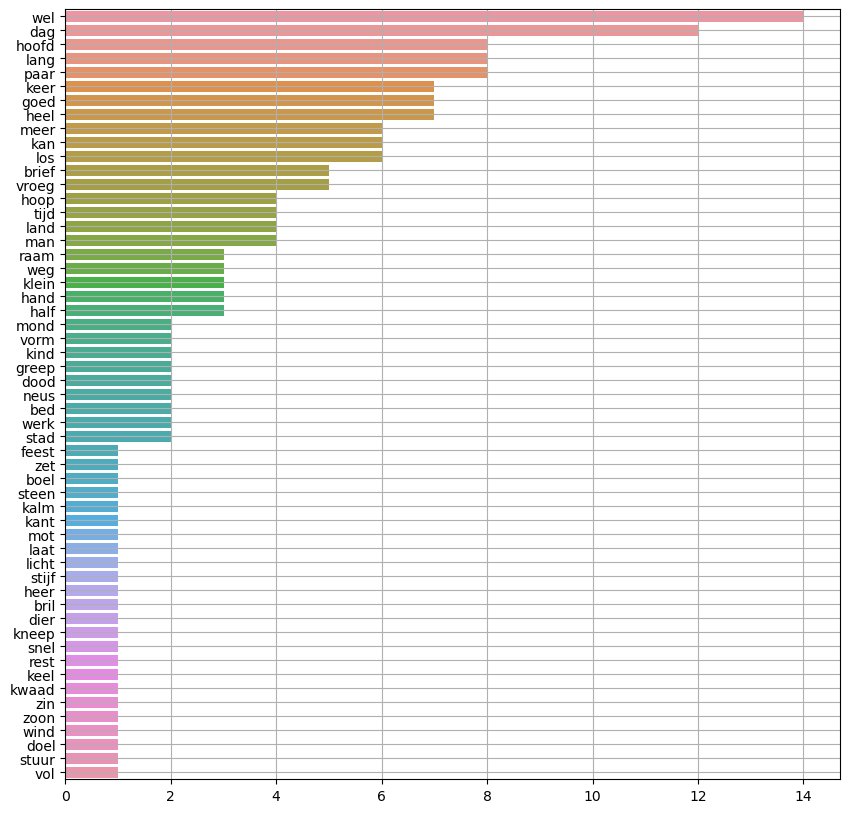

In [6]:
word_counts = all_words.where(all_words.isin(df.word)).value_counts()

plt.figure(figsize=(10,10))
sns.barplot(y=word_counts.index, x=word_counts)
plt.grid()
plt.show()

In [7]:
df_h1words = df[df.word.isin(all_words.where(all_words.isin(df.word)))]
df_h1words

,path,person,type,word,sample_rate,length,duration,dBFS,max_dBFS
2,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,laat,44100,29740.0,0.674376,-28.98248,-12.449308
13,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,brief,44100,25079.0,0.568685,-28.98248,-16.340028
21,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,raam,44100,20035.0,0.454308,-28.98248,-14.940677
38,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,greep,44100,29339.0,0.665283,-28.98248,-14.652383
39,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p11,words,keel,44100,18840.0,0.427211,-28.98248,-17.202388
...,...,...,...,...,...,...,...,...,...
4735,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p08,words,kant,44100,27013.0,0.612540,-28.98248,-13.193771
4775,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p08,words,keer,44100,25521.0,0.578707,-28.98248,-15.165635
4782,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p08,words,weg,44100,20925.0,0.474490,-28.98248,-11.741082
4786,/data/julber/Dutch_spoken_datasets/VariaNTS co...,p08,words,licht,44100,32082.0,0.727483,-28.98248,-13.550920


In [34]:
df_noth1words = df[df.word.isin(all_words.where(all_words.isin(df.word))) == False]
len(df_noth1words)

3920

In [35]:
# Replace the problematic 'föhn' value

prob_row = df_noth1words[
    df_noth1words.path == '/data/julber/Dutch_spoken_datasets/VariaNTS corpus/p01/p01_words/föhn.wav'
]

df_noth1words.loc[prob_row.index, 'path'] = '/data/julber/Dutch_spoken_datasets/VariaNTS corpus/p01/p01_words/fohn.wav'

In [17]:
df_h1words.to_csv('df_VariaNTS_HPCh1words.csv', index=False)
df_noth1words.to_csv('df_VariaNTS_NotHPCh1words.csv', index=False)

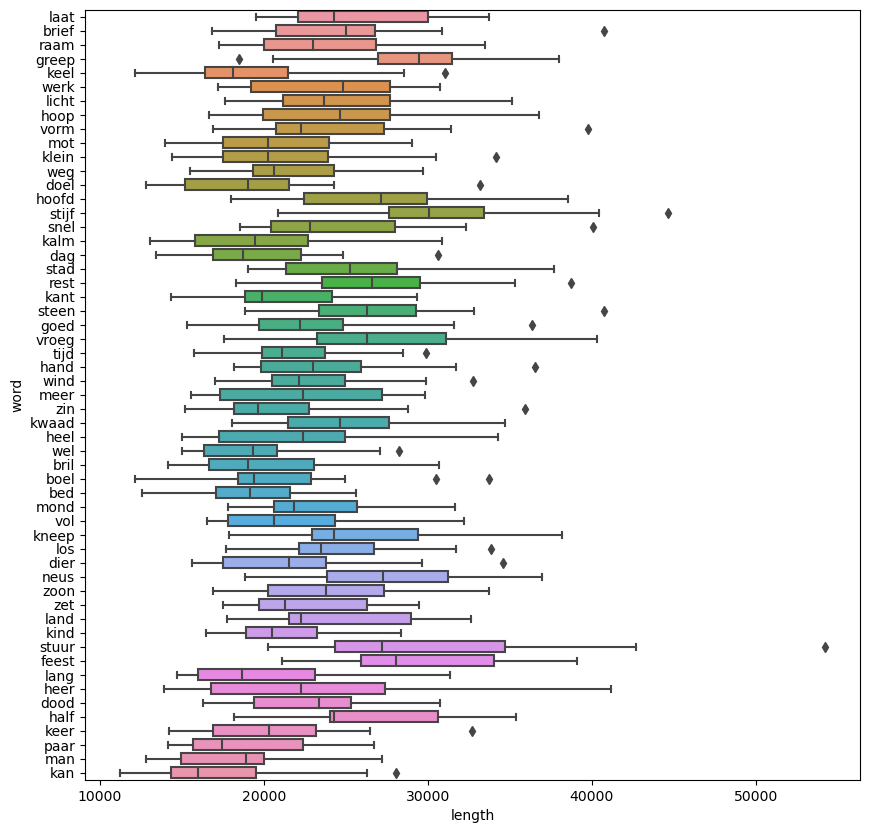

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_h1words, y='word', x='length')
plt.show()